<a href="https://colab.research.google.com/github/njafarov/Data-Science/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [21]:
df_new = pd.read_csv("Advertising.csv")
df_new.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# KNN Algorithm by hand where k=1

In [25]:
# Select part the of the data set
x_train = df_new.TV.iloc[5:13]
y_train = df_new.Sales.iloc[5:13]

# To avoid spaghetti effect in the chart, sort dataset
idx = np.argsort(x_train).values
x_train = x_train.iloc[idx].values
y_train = y_train.iloc[idx].values
print(x_train)
print(y_train)

[  8.6   8.7  23.8  57.5  66.1 120.2 199.8 214.7]
[ 4.8  7.2  9.2 11.8  8.6 13.2 10.6 17.4]


In [26]:
# create multiple data point along the x axis that can represent the data as a line
x = np.linspace(np.min(x_train),np.max(x_train))

# have to do the same thing for y
y = np.zeros(len(x))
print(x,y)

[  8.6         12.80612245  17.0122449   21.21836735  25.4244898
  29.63061224  33.83673469  38.04285714  42.24897959  46.45510204
  50.66122449  54.86734694  59.07346939  63.27959184  67.48571429
  71.69183673  75.89795918  80.10408163  84.31020408  88.51632653
  92.72244898  96.92857143 101.13469388 105.34081633 109.54693878
 113.75306122 117.95918367 122.16530612 126.37142857 130.57755102
 134.78367347 138.98979592 143.19591837 147.40204082 151.60816327
 155.81428571 160.02040816 164.22653061 168.43265306 172.63877551
 176.84489796 181.05102041 185.25714286 189.46326531 193.66938776
 197.8755102  202.08163265 206.2877551  210.49387755 214.7       ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [27]:
# create a function that substracts a number from array (x_train)
# and returns the index of the min result and its corresponding x_train value
# We later will use the index to find its corresponding y_train value

def new_neighbour(array, number):
  idx = pd.Series(np.abs(array-number)).idxmin()
  return idx, array[idx]

In [28]:
# Lets test our function
new_neighbour(x_train,25)

(2, 23.8)

In [29]:
# loop through the dataset and substract each element of x that we created above from x_train
for i, xi in enumerate(x):
  y[i]=y_train[new_neighbour(x_train, xi)[0]] # As we can tell, the first element of the result - index is provided to y_train

Text(0.5, 1.0, 'TV vs Sales')

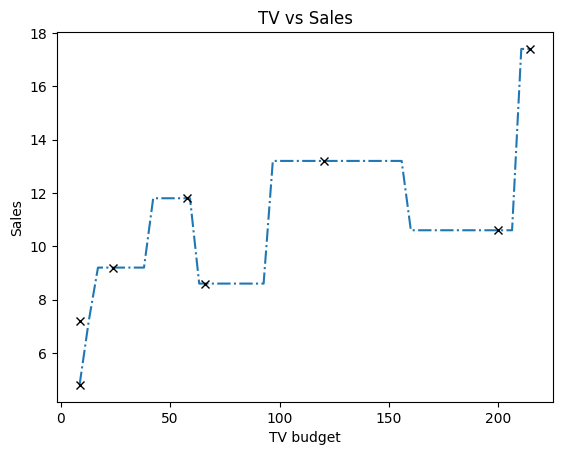

In [30]:
# Plot the data

plt.plot(x,y,"-.")
plt.plot(x_train,y_train,"kx")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV vs Sales")

#KNN using sklearn for k>1

In [55]:
# Import sklearn packages
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [32]:
# Quick check of data
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
# Define variables
x_new = df[["TV"]]
y_new = df["Sales"]
print(x_new)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]


In [34]:
# Split the data set into train and test
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.4,random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


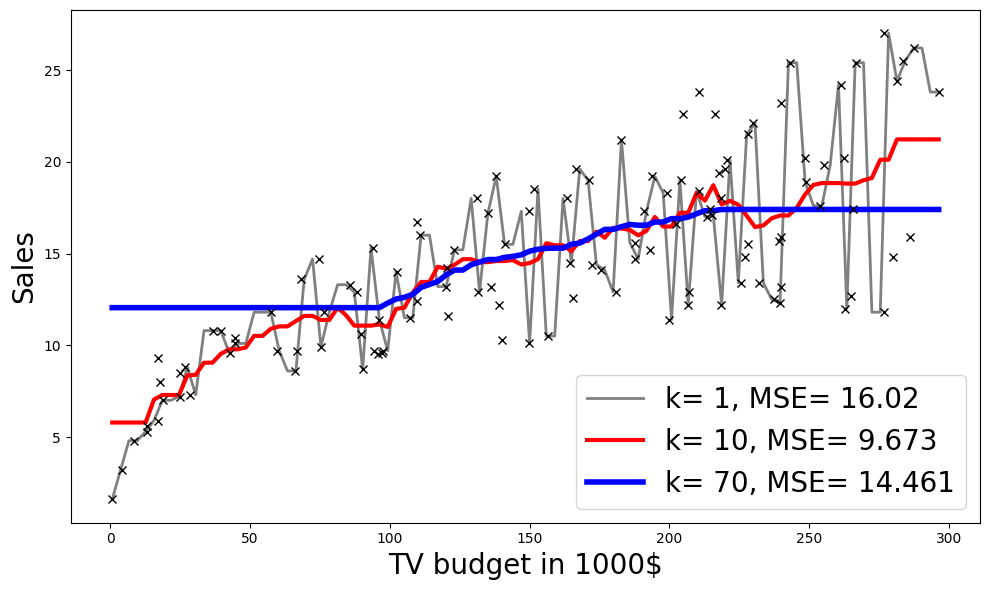

In [49]:
# Plot the results only for k=1,10,70

fig, ax = plt.subplots(figsize=(10,6))


# Set k values
k_min = 1
k_max = 70

# Create a dictionary to store the k value against MSE fit {k: MSE@k}
knn_dict = {}

# We will use the n to change the linewidth and color
n = 0

k_list = np.linspace(k_min,k_max,70)

for i in k_list:
  model = KNeighborsRegressor(n_neighbors=int(i))
  model.fit(x_train,y_train)
  pred = model.predict(x_test)

  MSE = mean_squared_error(y_true=y_test, y_pred=pred)

  # Store the MSE values of each k value in the dictionary
  knn_dict[i] = MSE



  colors = ["grey", "r","b"]
  if i in [1,10,70]:
    xvals = np.linspace(x_new.min(),x_new.max(),100)
    ypred = model.predict(xvals)
    ax.plot(xvals,ypred, '-', label=f'k= {int(i)}, MSE= {np.round(MSE,3)}',linewidth=n+2, color=colors[n])
    n+=1
ax.legend(loc="lower right", fontsize=20)
ax.plot(x_train, y_train,"x",label="Train",color='k')
ax.set_xlabel("TV budget in 1000$", fontsize=20)
ax.set_ylabel("Sales", fontsize=20)
plt.tight_layout()






As we can see, k=10 represents the dataset better, with lower MSE.

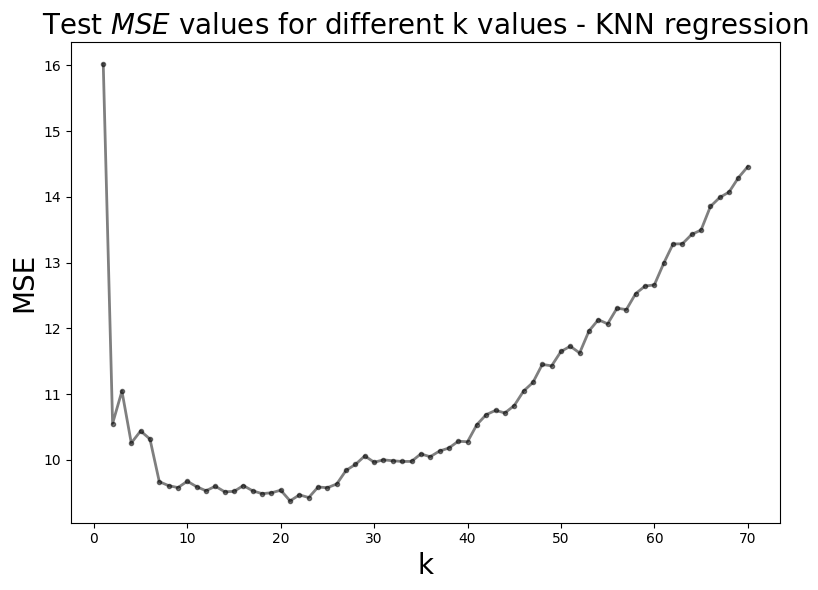

In [50]:
# Plot a graph which depicts the relation between the k values and MSE
plt.figure(figsize=(8,6))
plt.plot(knn_dict.keys(), knn_dict.values(),'k.-',alpha=0.5,linewidth=2)

# Set the title and axis labels
plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ values for different k values - KNN regression',fontsize=20)
plt.tight_layout()

In [52]:
### edTest(test_mse) ###

# Find the lowest MSE among all the kNN models
min_mse = min(knn_dict.values())

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [key  for (key, value) in knn_dict.items() if value == min_mse]

# Print the best k-value
print ("The best k value is ",best_model,"with a MSE of ", min_mse)

The best k value is  [21.0] with a MSE of  9.373705215419498


In [56]:
# Helper code to compute the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=int(best_model[0]))
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

# Print the R2 score of the model
print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")

The R2 score for your model is 0.6291573669955478
